# Data Visualizaion Part

step1: import data and showdata

In [1]:
f_handle = open('../public_data/movies_label.name')
label_name = list(map(lambda x:x.strip('\n'),f_handle.readlines()))

In [2]:
%matplotlib inline
from zDataManager import DataManager
input_dir = "../public_data"
output_dir = "../res"
print("Using input_dir: " + input_dir)
print("Using output_dir: " + output_dir)
basename = 'movies'
D = DataManager(basename, input_dir)

/Users/tinkle1129/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using input_dir: ../public_data
Using output_dir: ../res
Info file NOT found : /Users/tinkle1129/Desktop/code/public_data/movies_public.info
Reading ../public_data/movies_train.data...
Converting {} to correct array
Converting ../public_data/movies_train.data to sparse list
Reading ../public_data/movies_test.data...
Converting {} to correct array
Converting ../public_data/movies_test.data to sparse list
Reading ../public_data/movies_valid.data...
Converting {} to correct array
Converting ../public_data/movies_valid.data to sparse list
Reading ../public_data/movies_train.data...
Converting {} to correct array
Converting ../public_data/movies_train.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading ../public_data/movies_valid.data...
Converting {} to correct array
Converting ../public_data/movies_valid.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix

Description of Data set :
This is a multi-tag classification. The training data has 102592 dimension features, with 14 categories, each with values of 0 and 1.

In [3]:
print D

DataManager : movies
info:
	task = multilabel.classification
	valid_num = 3402
	has_categorical = 0
	feat_type = Mixed
	format = sparse
	metric = auc_metric
	target_type = Binary
	test_num = 5105
	label_num = 14
	target_num = 14
	train_num = 25521
	has_missing = 0
	usage = No Info File
	feat_num = 102592
	time_budget = 600
	is_sparse = 1
	name = movies
data:
	X_train = array(25521, 102592)
	Y_train = array(25521, 14)
	X_valid = array(3402, 102592)
	X_test = array(5105, 102592)
feat_type:	array(102592,)
feat_idx:	array(0,)



In [4]:
D.getLabel_name(label_name)  # Import Label Name
print D.label_name

['drama', 'action', 'adventure', 'animation', 'crime', 'fantasy', 'music', 'musical', 'mystery', 'romance', 'science fiction', 'sport', 'thriller', 'war']


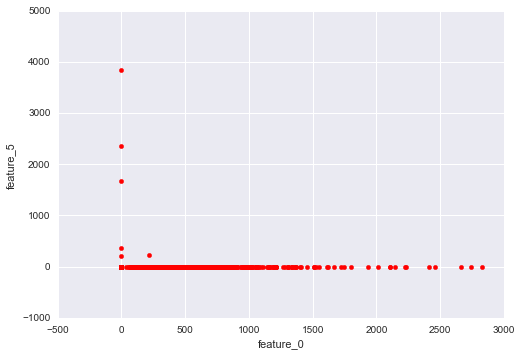

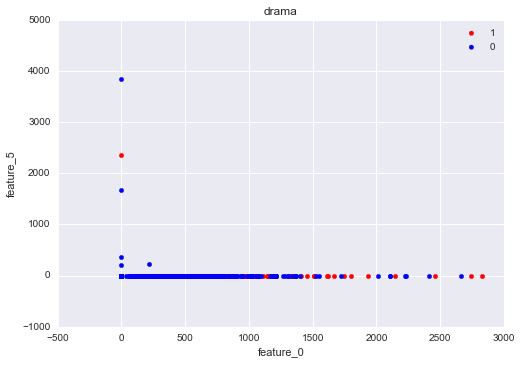

In [5]:
# At first we wanted to plot with the original data set
# Because the data is too large, so we do not using seaborn package, instead of using the original package for scatter
D.Init_ShowScatter(0,5,'train')
D.Init_ShowScatter(0,5,'train','drama')

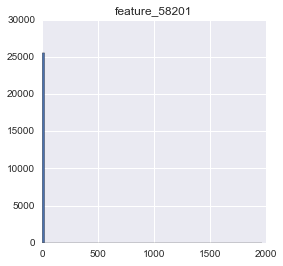

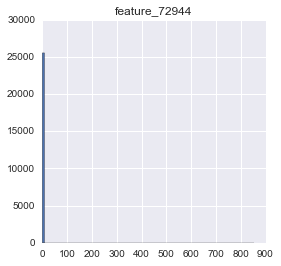

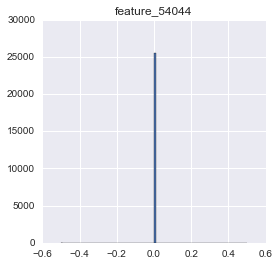

In [6]:
import matplotlib.pyplot as plt
import random
#We observe that the content of the feature is very sparse, a lot of value is 0 (zero)
for i in range(3):
    plt.figure(figsize=(4,4))
    idx = random.randint(0,102592)
    feature_0=D.data['X_train'].toarray()[:,idx]
    plt.hist(feature_0,100)
    plt.title('feature_'+str(idx))
    plt.show()

##PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
We using it to dimensionality reduction the data.
There are many reasons for us to reducing the data first. 1: make the data easier to display, easier to understand 2: Reduce the computational overhead of many algorithms 3: remove noise
So before doing the visualization, we do the PCA processing to the database.
But because our data is very sparse (such as X_train, X_test, X_validation are used sparse matrix form) Sparse matrix is a very large matrix, can not be converted into dense matrix, otherwise it will report memory error. There's a question, how to do the principal component analysis of this sparse matrix? We choose to use svd to do the PCA analysis of sparse matrix : https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca

In [7]:
from zPreprocessor import Preprocessor
Prepro = Preprocessor()

In [8]:
# Preprocess on the data and load it back into D
D.data['X_train'] = Prepro.fit_transform(D.data['X_train'], D.data['Y_train'])
D.data['X_valid'] = Prepro.transform(D.data['X_valid'])
D.data['X_test'] = Prepro.transform(D.data['X_test'])

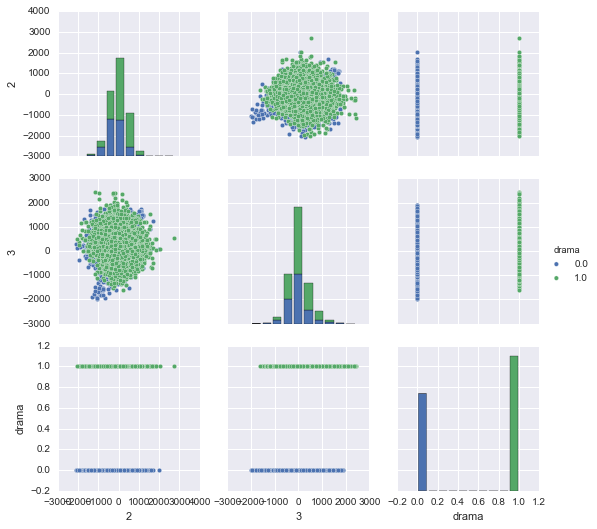

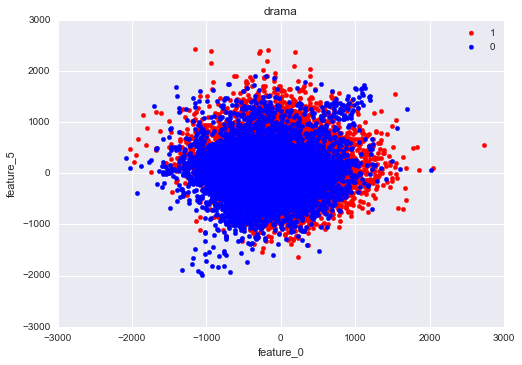

In [9]:
#Scatter plots of variables
#FacetGrid is a parcel used to draw the condition of the segmented data
#The main diagonal shows the data distribution of individual variables, 
#the rest is the correlation between the two variables
D.ShowScatter(2, 3, 'train','drama')# using seaborn
D.Init_ShowScatter(2,3,'train','drama')

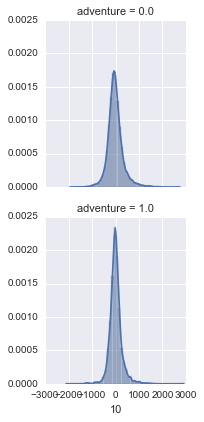

In [10]:
#Histograms of variables and target.
#Kernel Density Estimates，used to solve the problem that the performance of the histogram depends on the selection of its parameters
#To generate a KDE, we place a kernel function - that is,a smooth, high-salient function - on the position of each data point.
#Then we add the effect of all the kernel functions to obtain a smooth curve, the x-axis direction of any effect of the superposition can be calculated. 
#The KDE diagram solves the two major problems of the histogram.
#First, if the kernel function is determined, the KDE graph is unique and does not depend on the parameters given manually.
#Second, if the kernel function is smooth, we give KDE diagram is also smooth.
D.ShowDistplot('train',10,'adventure')

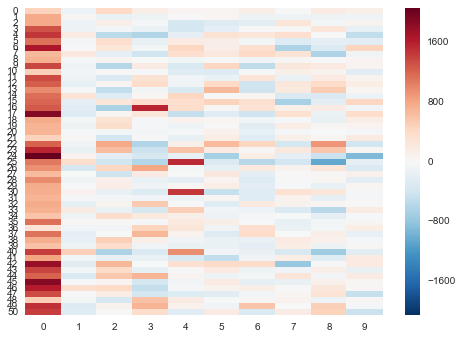

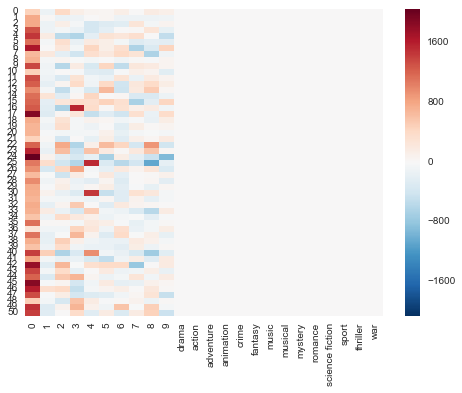

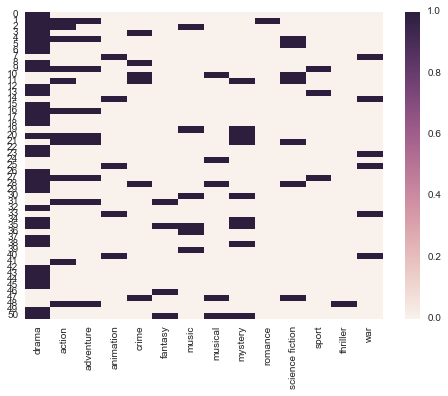

In [12]:
#Heatmap of the data matrix (and target).
#The heatmap reveals the degree of data density 
#and the color is used to characterize the current block
D.ShowHeatmap('train',range(10))
D.ShowHeatmap('train')
D.ShowHeatmap('train',D.label_name)

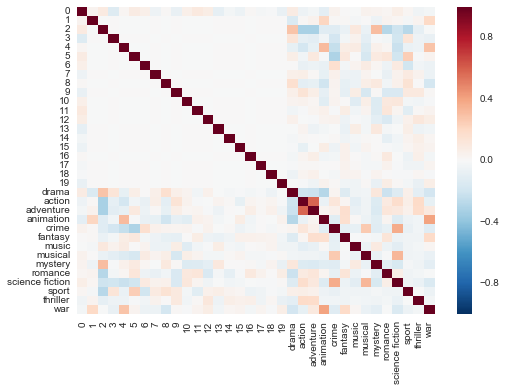

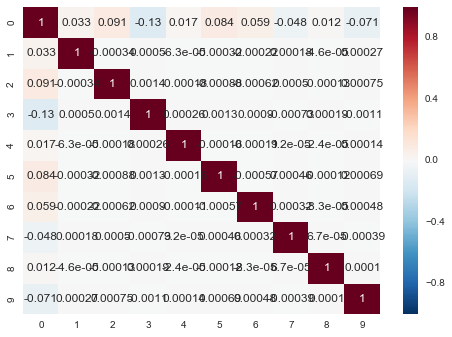

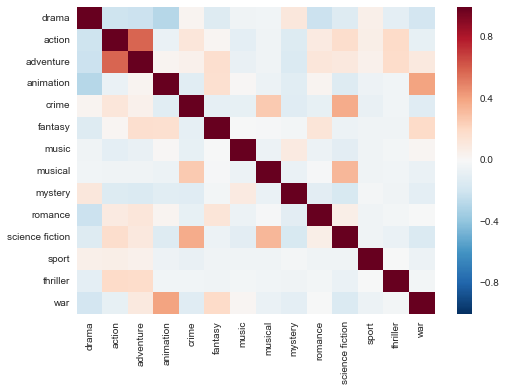

,drama,action,adventure,animation,crime,fantasy,music,musical,mystery,romance,science fiction,sport,thriller,war
drama,1.000000,-0.208763,-0.216760,-0.284272,0.023972,-0.128555,-0.044000,-0.035807,0.112253,-0.217192,-0.129986,0.058990,-0.095585,-0.180439
action,-0.208763,1.000000,0.578831,-0.070015,0.124419,0.021983,-0.099546,-0.040360,-0.136960,0.093208,0.178177,0.069429,0.188844,-0.083790
adventure,-0.216760,0.578831,1.000000,0.026332,0.052679,0.171581,-0.072731,-0.043965,-0.140764,0.122684,0.103371,0.047052,0.185662,0.100328
animation,-0.284272,-0.070015,0.026332,1.000000,-0.111831,0.161829,0.015435,-0.057264,-0.116972,0.028903,-0.125845,-0.052674,-0.031549,0.403996
crime,0.023972,0.124419,0.052679,-0.111831,1.000000,-0.087965,-0.083814,0.263243,-0.117597,-0.078899,0.369932,-0.071445,-0.038581,-0.118376
fantasy,-0.128555,0.021983,0.171581,0.161829,-0.087965,1.000000,-0.000447,-0.012425,-0.030846,0.130139,-0.055951,-0.040657,-0.040962,0.188094
music,-0.044000,-0.099546,-0.072731,0.015435,-0.083814,-0.000447,1.000000,-0.059403,0.093272,-0.058541,-0.106995,-0.045394,-0.030902,0.020607
musical,-0.035807,-0.040360,-0.043965,-0.057264,0.263243,-0.012425,-0.059403,1.000000,-0.069484,-0.012411,0.335055,-0.046197,-0.039035,-0.062948
mystery,0.112253,-0.136960,-0.140764,-0.116972,-0.117597,-0.030846,0.093272,-0.069484,1.000000,-0.104496,-0.161217,-0.023264,-0.046750,-0.100284
romance,-0.217192,0.093208,0.122684,0.028903,-0.078899,0.130139,-0.058541,-0.012411,-0.104496,1.000000,0.066996,-0.046744,-0.031165,-0.007743


In [17]:
#Heatmap of the variable correlation matrix.
D.ShowCorrcoefHeatmap('train')
import seaborn as sns
DF = D.toDF('train')
corr = DF.ix[:,range(10)].corr(method='pearson', min_periods=1)
sns.heatmap(corr,annot=True)
sns.plt.show()
corr
DF = D.toDF('train')
corr = DF.ix[:,D.label_name].corr(method='pearson', min_periods=1)
sns.heatmap(corr)
sns.plt.show()
corr

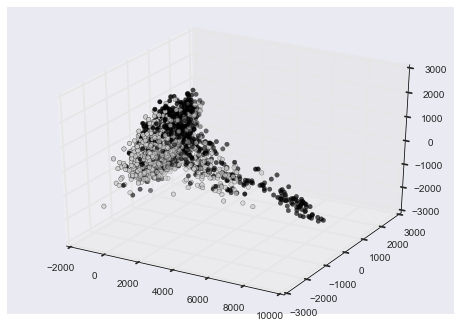

In [14]:
D.ShowJointGrid_PCA(3, 'train','drama')

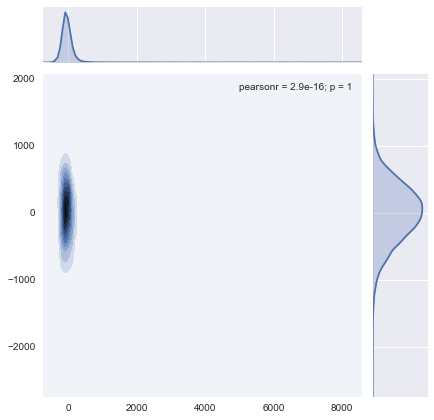

In [15]:
D.ShowJointPlot_PCA('train')

##Conclusion

###The Meaning of PCA

Multivariate large samples will undoubtedly provide a wealth of information for research and application, but also to a certain extent, increase the workload of data collection. More importantly, in most cases, there may be a correlation between many variables, thereby increasing the complexity of the analysis.At the same time, it will also cause inconvenience to the analysis.
If each indicator is analyzed separately, the analysis is isolated rather than integrated.

Therefore, we need to find a reasonable way to **reduce the analysis** of indicators at the same time, as far as possible to reduce the original index information loss, in order to achieve a comprehensive analysis of the collected data purposes.There is a certain correlation between the variables, it is possible to use less comprehensive indicators, integrated in the various variables in the various types of information.**PCA** belongs to this method.

The features to be **removed** are mainly those that are not related to class labels.And many of the features here are related to the class tag, but there is noise or redundancy.In this case, a feature to **reduction dimension** is required to reduce the number of features, reduce noise and redundancy, and reduce the possibility of **overfitting**.

The idea of PCA is to map **n-dimensional** features to **k-dimensions**, which are called principal components. This is a reconstructed **k-dimensional** feature, rather than simply removing **n-k**-dimensional features from the n-dimensional feature.PCA makes n features reduced to k, can be used for data compression，The correlation between newly generated features is small.